In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import opticaldevicelib_1d as od_1d
# od_1d.OpticalDevice.init_values(new_dx=5e-10, new_Nx=2**20, gpu_use=True)
od_1d.OpticalDevice.init_values(new_dx=1e-10*64, new_Nx=2**14, gpu_use=True)
print(f"границы поля X +- {od_1d.OpticalDevice.Nx * od_1d.OpticalDevice.dx * 1e6} мкм")

GPU is available!
границы поля X +- 104.8576 мкм


In [2]:
p = od_1d.PointSource(z=100, En=12) 
E_ps1 = p.E() / p.E() # плоская волна

N_gl = 40
Copy_flag = True
arr_len = 2 if Copy_flag else 2*N_gl

phases = 2*np.pi*np.random.rand(arr_len)
w_s = (np.random.rand(arr_len)-0.5)*np.pi/180*0
s_s  = (np.random.rand(arr_len)-0.5)*2e-6*0


crl = od_1d.CRL(lam=p.lam, arr_start=E_ps1, z=0,\
                 R=6.25e-6, A=50e-6, d=2e-6, N_lens=N_gl, mol="Si", dens=2.33)

crlm = od_1d.CRLm(lam=p.lam, arr_start=E_ps1, z=0, \
                   R=6.25e-6, A=50e-6, d=2e-6, N_lens=N_gl, mol="Si", dens=2.33, \
                   copy=Copy_flag, arr_phase=phases, arr_s=s_s, arr_w=w_s, b=0, m=3e8)

# crlm = crl
focus = crlm.focus()
crlm.set_z(z=focus)
print(f"фокусное расстояние = {focus * 1e3 :.3f} мм")
print(focus)
print(f"оценка макс. числа линз = {int(crlm.Lc() * np.pi / 2)}")

фокусное расстояние = 21.713 мм
0.021713152285625613
оценка макс. числа линз = 149


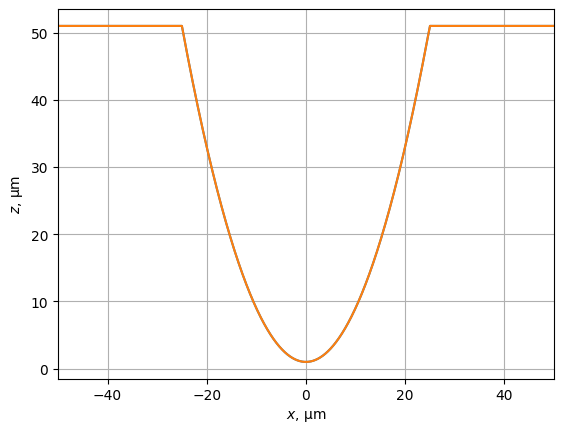

In [3]:
# %matplotlib widget

T_arr = crlm.T().get()
x_arr = crlm.x.get()
plt.plot(x_arr*1e6, crl.T().get()*1e6, label="ideal")
plt.plot(x_arr*1e6, T_arr*1e6, label="1 μm")
plt.xlim(-50, 50)
plt.grid()
# plt.legend()
plt.xlabel("$x$, μm")
plt.ylabel("$z$, μm")
plt.savefig("shape_elem", dpi=1200);
plt.show();

In [4]:
T_arr = crlm.T()
x_arr = crlm.x

In [5]:
Nx = crl.Nx
phi_arr = np.empty(shape=Nx)

In [6]:
d2x_arr = x_arr[:-2] - x_arr[2:]
d2T_arr = T_arr[:-2] - T_arr[2:]
ans = np.arctan(d2T_arr / d2x_arr)
phi_arr = np.concatenate((cp.array([0]), ans, cp.array([0])))
phi_arr

array([ 0., -0., -0., ..., -0., -0.,  0.])

In [7]:
n = 1 - crl.delta
n = 0.99

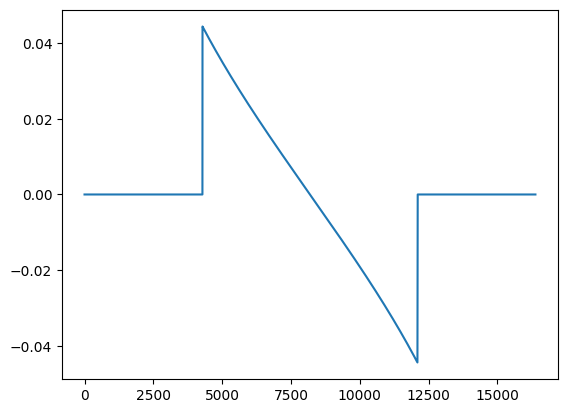

In [8]:
del_phi_arr = phi_arr - np.arcsin(np.sin(phi_arr)/n)
plt.plot(del_phi_arr.get())

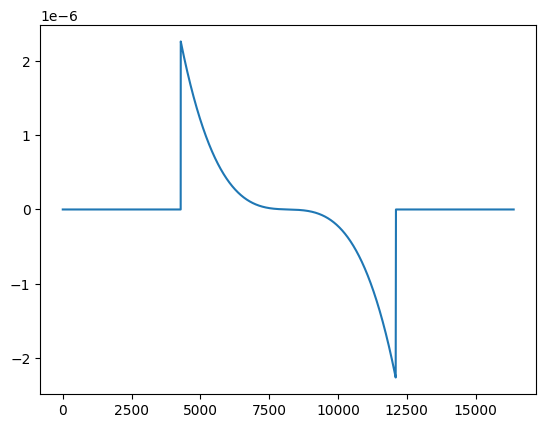

In [9]:
delta_x_arr = T_arr*np.tan(del_phi_arr)
plt.plot(delta_x_arr.get())

In [10]:
x_new_arr = x_arr + delta_x_arr

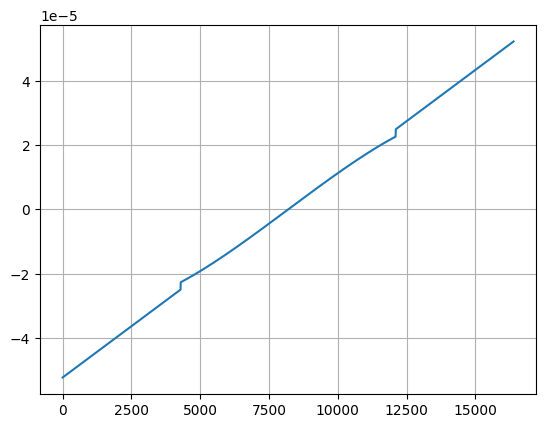

In [11]:
plt.plot(x_new_arr.get())
plt.grid()

In [12]:
dphi = del_phi_arr[Nx//2+3000]
x0 = x_new_arr[Nx//2+3000]
print(x0, dphi)
# i_arr = []

# for i in range(Nx):
#     if i!=0 and i!=Nx-1:
#         x01 = T_arr[i] * np.tan(dphi) + x_arr[i]
#         x02 = T_arr[i+1] * np.tan(dphi) + x_arr[i+1]
#         if x01 <= x0 <= x02:
#             i_arr.append(i)

1.8206009059584884e-05 -0.032682046796691955


In [13]:
# %%timeit
x0_arr = T_arr * np.tan(dphi) + x_arr
x0_arr[np.argmin(abs(x0_arr-x0))] # найти ближайший из x к точке пересечения луча с линзой

array(1.82060091e-05)

In [14]:
x_on_lens = T_arr * cp.tan(del_phi_arr) + x_arr[cp.argmin(cp.abs(np.subtract.outer(x_new_arr, T_arr * cp.tan(del_phi_arr) + x_arr)), axis=1)]

In [ ]:
print(x_on_lens[Nx//2+3000])

In [ ]:
np.tan(dphi)

In [ ]:
print(dphi, x0)

In [ ]:
%matplotlib widget
plt.clf()
plt.plot(x_new_arr, (x0-x_new_arr)/np.tan(dphi))
plt.scatter(x_arr[i_arr[-1]], T_arr[i_arr[-1]])
plt.plot(x_arr, T_arr)
plt.ylim(0, 52e-6)
plt.show()
# plt.xlim(0, 50e-6)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
del_phi_arr[Nx//2+800]

In [ ]:
Nx